# Price Prediction using Regression

This is a tickets pricing monitoring system. It scrapes tickets pricing data periodically and stores it in a database. Ticket pricing changes based on demand and time, and there can be significant difference in price. We are creating this product mainly with ourselves in mind. Users can set up alarms using an email, choosing an origin and destination (cities), time (date and hour range picker) choosing a price reduction over mean price, etc.

**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

#### **Task 1: Import Dataset and create a copy of that dataset**

In [2]:
#write code here
data = pd.read_csv('data1.csv')
df = data.copy()

#### **Task 2: Display first five rows** 

In [3]:
#write code here
df.head(5)

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


#### **Task 3: Drop 'unnamed: 0' column**

In [4]:
#write code here
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo
...,...,...,...,...,...,...,...,...,...
215904,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 17:00:00,2019-06-01 19:38:00,AVE,47.30,Turista,Promo
215905,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 18:00:00,2019-06-01 20:32:00,AVE,47.30,Turista,Promo
215906,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 19:00:00,2019-06-01 21:38:00,AVE,47.30,Turista,Promo
215907,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 20:35:00,2019-06-01 23:15:00,AVE,47.30,Turista,Promo


#### **Task 4: Check the number of rows and columns**

In [6]:
#write code here
df.shape

(215909, 9)

#### **Task 5: Check data types of all columns**

In [7]:
#write code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215909 entries, 0 to 215908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   insert_date  215909 non-null  object 
 1   origin       215909 non-null  object 
 2   destination  215909 non-null  object 
 3   start_date   215909 non-null  object 
 4   end_date     215909 non-null  object 
 5   train_type   215909 non-null  object 
 6   price        202321 non-null  float64
 7   train_class  215266 non-null  object 
 8   fare         215266 non-null  object 
dtypes: float64(1), object(8)
memory usage: 14.8+ MB


#### **Task 6: Check summary statistics**

In [8]:
#write code here
df.describe()

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


#### **Task 7: Check summary statistics of all columns, including object dataypes**

In [9]:
df.describe(include='all')

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


**Question: Explain the summary statistics for the above data set**

**Answer:** Minimum price of a ticket is 16.6 and maximum is 206.8. 5 unique train classes.

#### **Task 8: Check null values in dataset**

In [10]:
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

#### **Task 9: Fill the Null values in the 'price' column.**<br>
*Hint: Take mean*

In [11]:
#write code here
df['price'] = df['price'].fillna(df['price'].mean())

In [12]:
df.isnull().sum()

insert_date      0
origin           0
destination      0
start_date       0
end_date         0
train_type       0
price            0
train_class    643
fare           643
dtype: int64

#### **Task 10: Drop the rows containing Null values in the attributes train_class and fare**

In [13]:
#write code here
df.dropna(subset=['train_class','fare'],axis='rows', inplace=True)

In [14]:
df.isnull().sum()

insert_date    0
origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

In [15]:
df.shape

(215266, 9)

#### **Task 11: Drop 'insert_date'**

In [16]:
#write code here
df.drop('insert_date', axis=1, inplace=True)

In [17]:
df

,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo
...,...,...,...,...,...,...,...,...
215904,MADRID,SEVILLA,2019-06-01 17:00:00,2019-06-01 19:38:00,AVE,47.30,Turista,Promo
215905,MADRID,SEVILLA,2019-06-01 18:00:00,2019-06-01 20:32:00,AVE,47.30,Turista,Promo
215906,MADRID,SEVILLA,2019-06-01 19:00:00,2019-06-01 21:38:00,AVE,47.30,Turista,Promo
215907,MADRID,SEVILLA,2019-06-01 20:35:00,2019-06-01 23:15:00,AVE,47.30,Turista,Promo


**Check null values again in dataset**

In [18]:
#write code here
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

#### **Task 12: Plot number of people boarding from different stations**


<Axes: xlabel='origin', ylabel='count'>

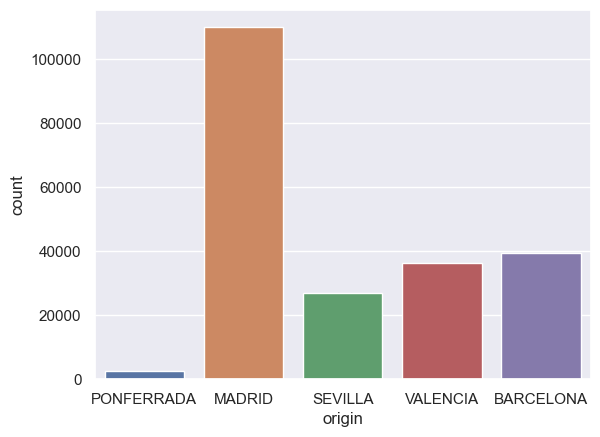

In [19]:
#write code here
sns.countplot(x='origin', data=df)

**Question: What insights do you get from the above plot?**

**Answer:** Most of the people are boarding from Madrid

#### **Task 13: Plot number of people for the destination stations**


<Axes: xlabel='destination', ylabel='count'>

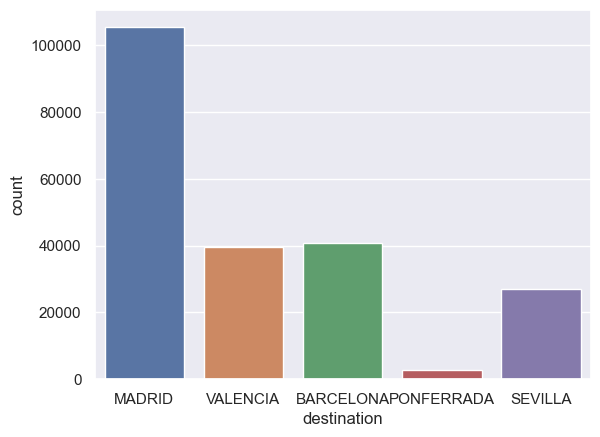

In [20]:
#write code here
sns.countplot(x='destination', data=df)

**Question: What insights do you get from the above graph?**

**Answer:** Most of the people destination is MADRID

#### **Task 14: Plot different types of train that runs in Spain**


In [21]:
df.head(3)

,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +


<Figure size 1600x800 with 0 Axes>

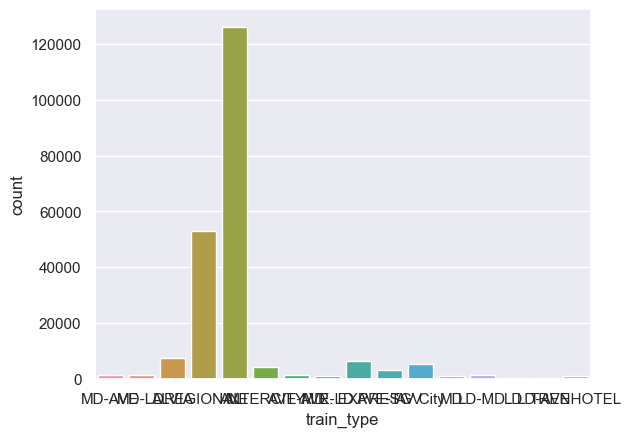

<Figure size 1600x800 with 0 Axes>

In [22]:
#write code here
sns.countplot(x='train_type',data=df)
plt.figure(figsize=(16,8))
           

**Question: Which train runs the maximum in number as compared to other train types?**

**Answer:** 


#### **Task 15: Plot number of trains of different class**


<Axes: xlabel='train_class', ylabel='count'>

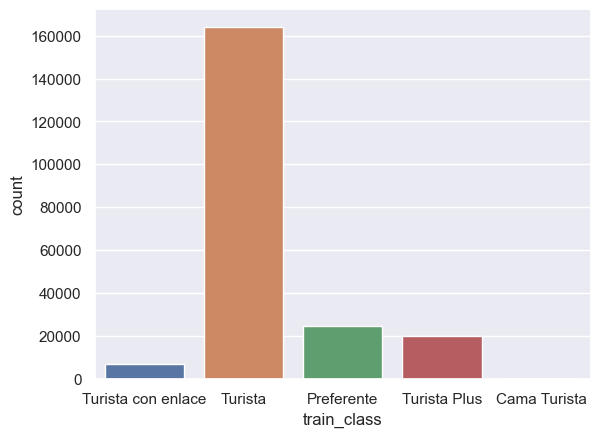

In [23]:
#write code here
sns.countplot(x='train_class',data=df)

**Question: Which the most common train class for traveling among people in general?**

**Answer:** Turista is the most common train class for traveling among people in general.


#### **Task 16: Plot number of tickets bought from each category**


In [24]:
#write code here
df.head(5)

,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


<Axes: xlabel='fare', ylabel='count'>

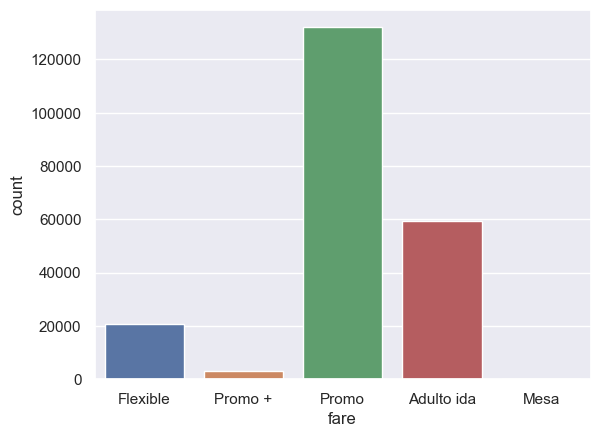

In [25]:
sns.countplot(x='fare', data=df)

**Question: Which the most common tickets are bought?**

**Answer:** Promo fare tickets are most common bought.

#### **Task 17: Plot distribution of the ticket prices**

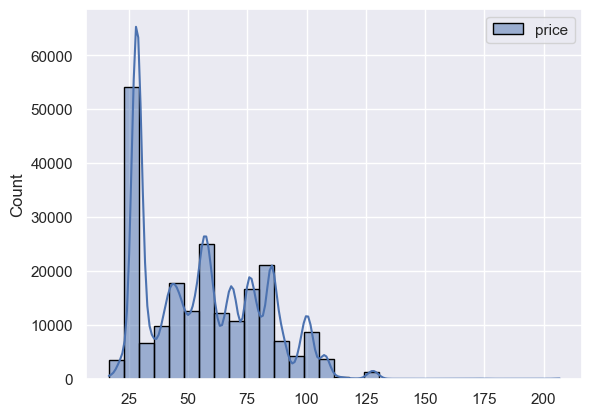

<Figure size 1600x800 with 0 Axes>

In [26]:
#write code here
sns.histplot(df, color='lightgreen', ec='black', bins=30, kde=True)
plt.figure(figsize=(16,8))
plt.show()

**Question: What readings can you get from the above plot?**

**Answer:** After reading the above plot I understand that most of the people buy 25$.     

###### **Task 18: Show train_class vs price through boxplot**

<Axes: xlabel='price', ylabel='train_class'>

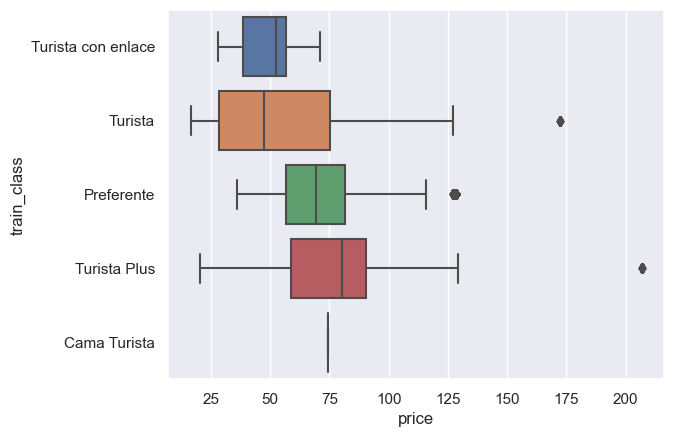

In [27]:
#write code here
sns.boxplot(x='price', y='train_class', data=df)

**Question: What pricing trends can you find out by looking at the plot above?**

**Answer:** From the above chart it is clear that most of the people buys tickets between 50$ to 80$.  

#### **Task 19: Show train_type vs price through boxplot**


<Axes: xlabel='price', ylabel='train_type'>

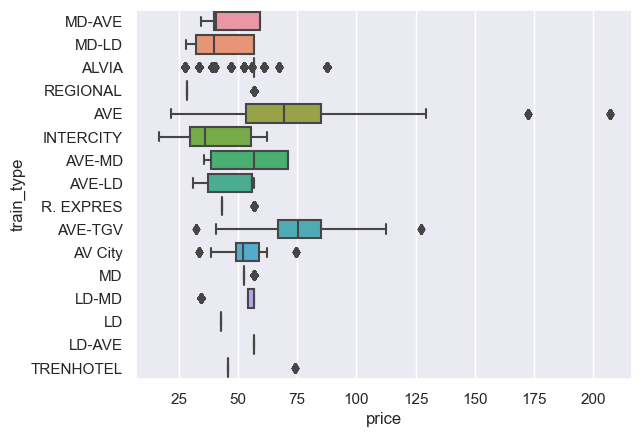

In [28]:
#write code here
sns.boxplot(x='price', y='train_type', data=df)

**Question: Which type of trains cost more as compared to others?**

**Answer:** AVE and AVE-TGV trains cost more as compared to others

## Feature Engineering


In [29]:
df = df.reset_index()

**Finding the travel time between the place of origin and destination**<br>
We need to find out the travel time for each entry which can be obtained from the 'start_date' and 'end_date' column. Also if you see, these columns are in object type therefore datetimeFormat should be defined to perform the necessary operation of getting the required time.

**Import datetime library**

In [30]:
#write code here
import datetime

In [31]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)                  
    

In [32]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1) 

#### **Task 20: Remove redundant features**


**You need to remove features that are giving the related values as  'travel_time_in_hrs'**<br>
*Hint: Look for date related columns*

In [33]:
#write code here
df.drop(['start_date','end_date'], axis=1, inplace=True)

We now need to find out the pricing from 'MADRID' to other destinations. We also need to find out time which each train requires for travelling. 

## **Travelling from MADRID to SEVILLA**

#### Task 21: Findout people travelling from MADRID to SEVILLA

In [34]:
df.head(2)

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.7
1,1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.8


In [35]:
#write code here
df1 = df[(df['origin']=='MADRID') & (df['destination']=='SEVILLA')]

#### Task 22: Make a plot for finding out travelling hours for each train type

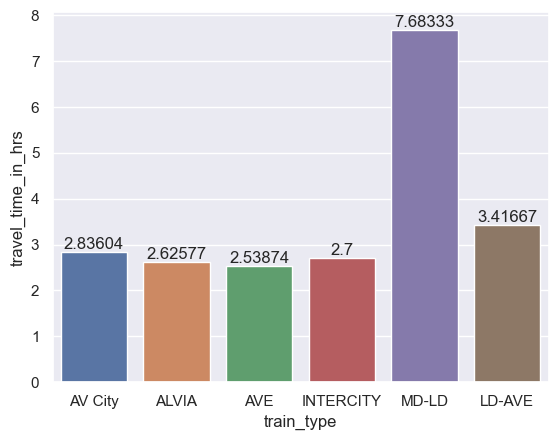

In [36]:
#write code here
ax = sns.barplot(x='train_type', y='travel_time_in_hrs', data=df1)
for bars in ax.containers:
    ax.bar_label(bars)

#### **Task 23: Show train_type vs price through boxplot**


<Axes: xlabel='price', ylabel='train_type'>

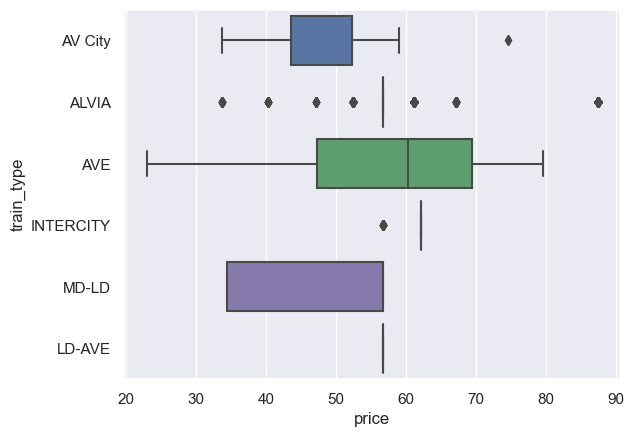

In [37]:
#write code here
sns.boxplot(x='price', y='train_type', data=df1)

## **Travelling from MADRID to BARCELONA**


#### Task 24: Findout people travelling from MADRID to BARCELONA

In [38]:
#write code here
df1 = df[(df['origin']=='MADRID') & (df['destination']=='BARCELONA')]

#### Task 25: Make a plot for finding out travelling hours for each train type

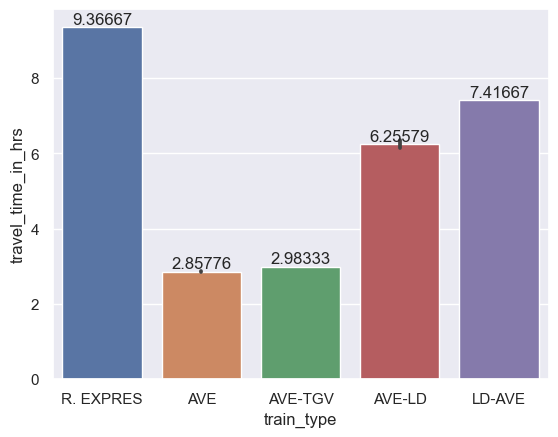

In [39]:
#write code here
ax = sns.barplot(x='train_type', y='travel_time_in_hrs', data=df1)
for bars in ax.containers:
    ax.bar_label(bars)

#### **Task 26: Show train_type vs price through boxplot**

<Axes: xlabel='price', ylabel='train_type'>

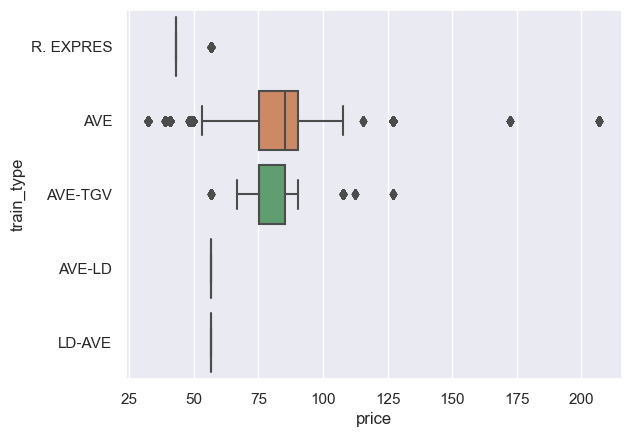

In [40]:
#write code here
sns.boxplot(x='price', y='train_type', data=df1)

## **Travelling from MADRID to VALENCIA**

#### Task 27: Findout people travelling from MADRID to VALENCIA

In [41]:
#write code here
df1 = df[(df['origin']=='MADRID') & (df['destination']=='VALENCIA')]

#### Task 28: Make a plot for finding out travelling hours for each train type

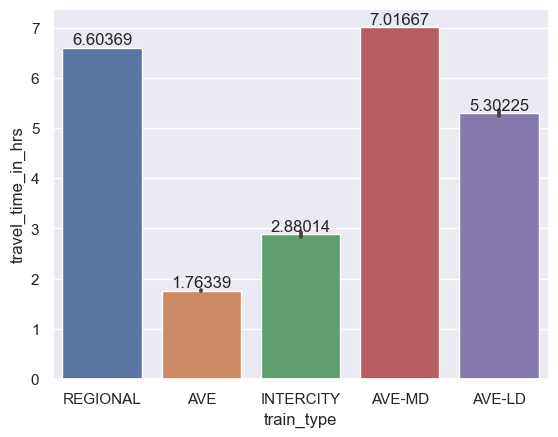

In [42]:
#write code here
ax = sns.barplot(x='train_type', y='travel_time_in_hrs', data=df1)
for bars in ax.containers:
    ax.bar_label(bars)

#### **Task 29: Show train_type vs price through boxplot**

<Axes: xlabel='price', ylabel='train_type'>

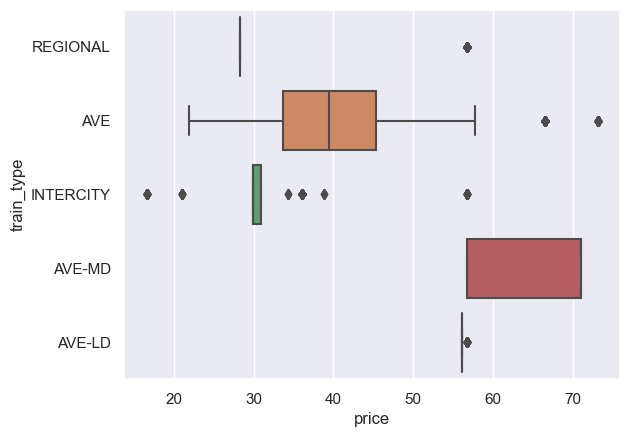

In [43]:
#write code here
sns.boxplot(x='price', y='train_type', data=df1)

## **Travelling from MADRID to PONFERRADA**

#### Task 30: Findout people travelling from MADRID to PONFERRADA

In [44]:
#write code here
df1 = df[(df['origin']=='MADRID') & (df['destination']=='PONFERRADA')]

#### Task 31: Make a plot for finding out travelling hours for each train type

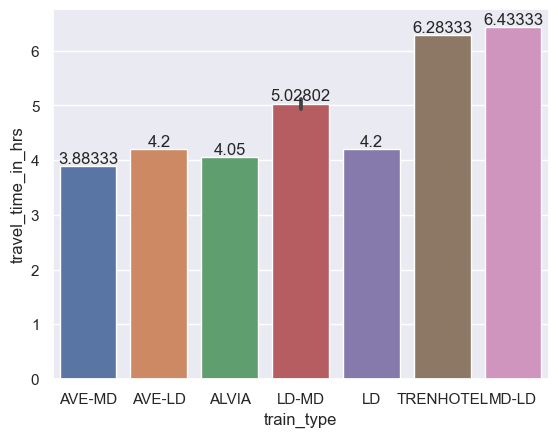

In [45]:
#write code here
ax =sns.barplot(x='train_type', y='travel_time_in_hrs', data=df1)
for bars in ax.containers:
    ax.bar_label(bars)

#### **Task 32: Show train_type vs price through boxplot**

<Axes: xlabel='price', ylabel='train_type'>

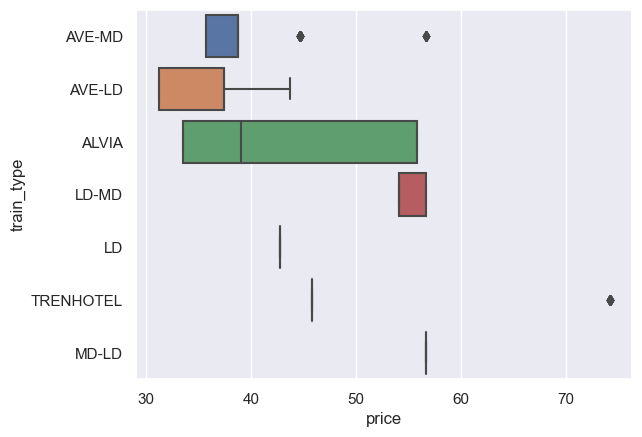

In [46]:
#write code here
sns.boxplot(x='price', y='train_type', data=df1)

# Applying Linear  Regression

In [47]:
df.head(2)

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.7
1,1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.8


#### Task 33: Import LabelEncoder library from sklearn 

In [48]:
#write code here
from sklearn.preprocessing import LabelEncoder

**Data Encoding**

In [49]:
lab_en = LabelEncoder()
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])

C:\Users\hassa\AppData\Local\Temp\ipykernel_6204\981364822.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
C:\Users\hassa\AppData\Local\Temp\ipykernel_6204\981364822.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
C:\Users\hassa\AppData\Local\Temp\ipykernel_6204\981364822.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the 

In [50]:
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,2,1,11,59.50,4,1,4.700000
1,1,2,1,11,34.65,4,4,5.800000
2,2,2,1,12,39.95,4,4,5.916667
3,3,2,1,11,40.60,4,4,4.983333
4,4,2,1,0,27.90,2,3,4.133333


#### Task 34: Separate the dependant and independant variables

In [51]:
#write code here
X = df.drop('price',axis=1)
Y = df['price']

In [52]:
X.head()

,index,origin,destination,train_type,train_class,fare,travel_time_in_hrs
0,0,2,1,11,4,1,4.700000
1,1,2,1,11,4,4,5.800000
2,2,2,1,12,4,4,5.916667
3,3,2,1,11,4,4,4.983333
4,4,2,1,0,2,3,4.133333


In [53]:
Y.head()

0    59.50
1    34.65
2    39.95
3    40.60
4    27.90
Name: price, dtype: float64

#### Task 35: Import test_train_split from sklearn

In [54]:
#write code here
from sklearn.model_selection import train_test_split

#### Task 36:**Split the data into training and test set**

In [55]:
#write code here
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.30, random_state=25, shuffle=True)

#### Task 37: Import LinearRegression library from sklearn

In [56]:
#write code here
from sklearn.linear_model import LinearRegression

#### Task 38: Make an object of LinearRegression( ) and train it using the training data set

In [57]:
#write code here
lr = LinearRegression()

In [58]:
#write code here
lr.fit(X_train,Y_train)

LinearRegression()

#### Task 39: Find out the predictions using test data set.

In [59]:
#write code here
lr_predict = lr.predict(X_test)

#### Task 40: Find out the predictions using training data set.

In [60]:
#write code here
lr_predict_train = lr.predict(X_train)

#### Task 41: Import r2_score library form sklearn

In [61]:
#write code here
from sklearn.metrics import r2_score

#### Task 42: Find out the R2 Score for test data and print it.

In [62]:
#write code here
lr_r2_test= r2_score(Y_test,lr_predict)

#### Task 43: Find out the R2 Score for training data and print it.

In [63]:
lr_r2_train = r2_score(Y_train,lr.predict(X_train))

Comaparing training and testing R2 scores

In [64]:
print('R2 score for Linear Regression Testing Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

R2 score for Linear Regression Testing Data is:  0.725680010304607
R2 score for Linear Regression Testing Data is:  0.730920796150911


# Applying Polynomial Regression

#### Task 44: Import PolynomialFeatures from sklearn

In [65]:
#write code here
from sklearn.preprocessing import PolynomialFeatures

#### Task 45: Make and object of default Polynomial Features

In [66]:
#write code here
poly_reg = PolynomialFeatures(degree=2)

#### Task 46: Transform the features to higher degree features.

In [67]:
#write code here
X_train_poly= poly_reg.fit_transform(X_train)
X_test_poly= poly_reg.fit_transform(X_test)

#### Task 47: Fit the transformed features to Linear Regression

In [68]:
#write code here
poly_model = LinearRegression()
poly_model.fit(X_train_poly,Y_train)

LinearRegression()

#### Task 48: Find the predictions on the data set

In [69]:
#write code here
y_train_predicted = poly_model.predict(X_train_poly)
y_test_predicted = poly_model.predict(X_test_poly)

#### Task 49: Evaluate R2 score for training data set

In [70]:
#evaluating the model on training dataset
#write code here
r2_train = r2_score(Y_train,y_train_predicted)

#### Task 50: Evaluate R2 score for test data set

In [71]:
# evaluating the model on test dataset
#write code here
r2_test = r2_score(Y_test,y_test_predicted)

Comaparing training and testing R2 scores

In [72]:
#write code here
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

The r2 score for training set is:  0.8226205944904157
The r2 score for testing set is:  0.8230804441846306


#### Task 51: Select the best model

**Question: Which model gives the best result for price prediction? Find out the complexity using R2 score and give your answer.**<br>
*Hint: Use for loop for finding the best degree and model complexity for polynomial regression model*

In [73]:
#write code here
r2_train=[]
r2_test=[]
for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly= poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)
    poly = LinearRegression()
    poly.fit(X_tr_poly, Y_train)
   
    y_tr_predicted,y_tst_predict = poly.predict(X_tr_poly),poly.predict(X_tst_poly)
    r2_train.append(r2_score(Y_train, y_tr_predicted))
    r2_test.append(r2_score(Y_test, y_tst_predict))
    
print ('R2 Train', r2_train)
print ('R2 Test', r2_test)

R2 Train [0.725680010304607, 0.8226205944904157, 0.8132960478067139, 0.7203181691524806, -0.25788907042686127]
R2 Test [0.7309207961509114, 0.8230804441846306, 0.8146672192856734, 0.7225227237534686, -0.24127651145468643]


In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
cross_train_score = cross_val_score(poly,X_tst_poly,Y_test,cv=10)
cross_train_score

array([-3.28055292,  0.37128809,  0.3976392 , -1.31992235,  0.4715279 ,
       -2.51331421,  0.29373274, -0.23016419, -0.64179484,  0.48695706])

In [76]:
print("The CV Score is: ", np.mean(cross_train_score))

The CV Score is:  -0.5964603535432148


#### Plotting the model

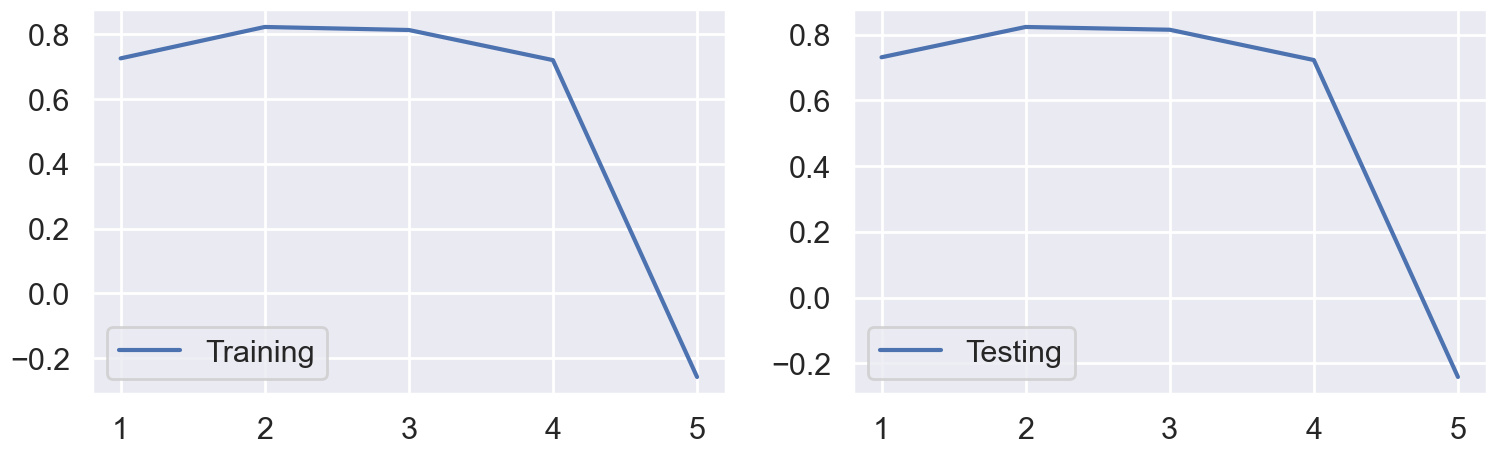

In [77]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training');
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing');

**Answer**

Model Performance is good, On Degree 1 model was good but at Degree 2 model Training and Testing Score is about 0.82 which is the highest among all and after degree 2 model score start deceiling.